In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [172]:
def update_progress(progress,total):
    print('\r{0:.3f}% to finish'.format(progress/total),end="",flush=True)

# flip a coin twice: A - HH, B - HT

In [4]:
def flip_coin(k):
    temp = np.random.rand(k)
    temp = (temp > .5).astype(int)
    coin = {0:'H',1:'T'}
    temp = list(map(coin.get,temp))
    return temp

In [32]:
n = 1000
N = 100
result={'P_A':[],'P_B':[]}
for simTime in range(N):
    A=[];B=[]
    for flipTime in range(n):
        A.append(flip_coin(2))
        B.append(flip_coin(2))
    A = np.array(A);B = np.array(B)
    p_A = np.sum(np.sum(A == ['H','H'],axis=1) == 2)/len(A)
    p_B = np.sum(np.sum(B == ['H','T'],axis=1) == 2)/len(B)
    result['P_A'].append(p_A);result['P_B'].append(p_B)
result = pd.DataFrame(result)

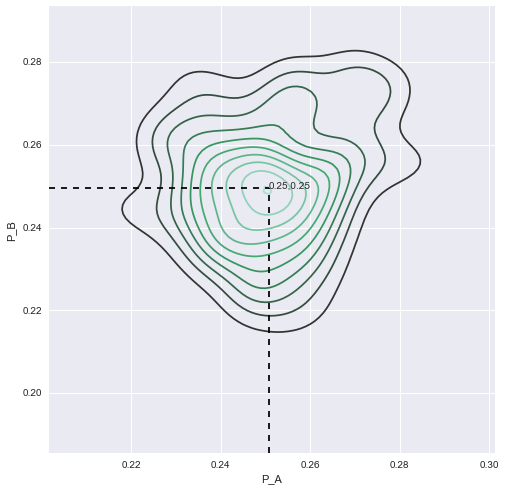

In [44]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax=sns.kdeplot(result['P_A'],result['P_B'],ax=ax)
ax.hlines(result.P_B.mean(),xmin=ax.get_xlim()[0],xmax=result.P_A.mean(),linestyle='--')
ax.vlines(result.P_A.mean(),ymin=ax.get_ylim()[0],ymax=result.P_B.mean(),linestyle='--')
ax.annotate('%.2f,%.2f'%(result.P_A.mean(),result.P_B.mean()),xy=(result.P_A.mean(),result.P_B.mean()))

# flip a coin repeatedly until you get 'HH' or 'HT', which one needs more flips?

In [85]:
targets = [['H','H'],['H','T']]
result = []
for k in range(5000):
    tempVec = np.array([0,0])
    for jj,target in enumerate(targets):
        temp=[];
        for ii in range(1000):
            if len(temp) > 2:
                if temp[-2:]==target:
                    tempVec[jj]=len(temp)
                    break
                else:
                    temp.append(flip_coin(1)[0])
            else:
                temp.append(flip_coin(1)[0])
    result.append(tempVec)
result = np.array(result)

In [145]:
def flip_emerge(target,seqLen):
    temp=[];
    for ii in range(int(1e5)):
        if len(temp) > seqLen:
            if temp[-seqLen:]==target:
                result=len(temp)
                break
            else:
                temp.append(flip_coin(1)[0])
        else:
            temp.append(flip_coin(1)[0])
    return result,temp

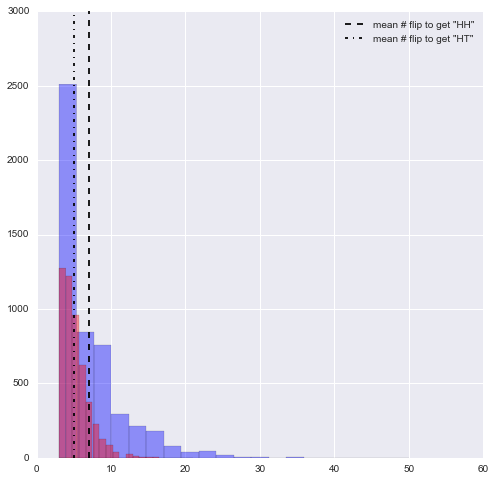

In [89]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
_=ax.hist(result[:,0],color='blue',bins=20,alpha=0.4)
_=ax.axvline(result[:,0].mean(),color='k',linestyle='--',label='mean # flip to get "HH"')
_=ax.hist(result[:,1],color='red',bins=20,alpha=0.4)
_=ax.axvline(result[:,1].mean(),color='k',linestyle='-.',label='mean # flip to get "HT"')
ax.legend()

# flip a coin repeatedly until either HH (I win) or HT (you win), is this fair?

In [141]:
n = 5000
N = 100
winning=[]
for ii in range(n):
    result = []
    for simTime in range(N):
        result.append(flip_coin(3))
        M = np.array(result)[:,-2:]
        HH = np.sum(np.sum(M == ['H','H'],axis=1)==2)
        HT = np.sum(np.sum(M == ['H','T'],axis=1)==2)
    winning.append([HH/len(M),HT/len(M)])
winning=np.array(winning)

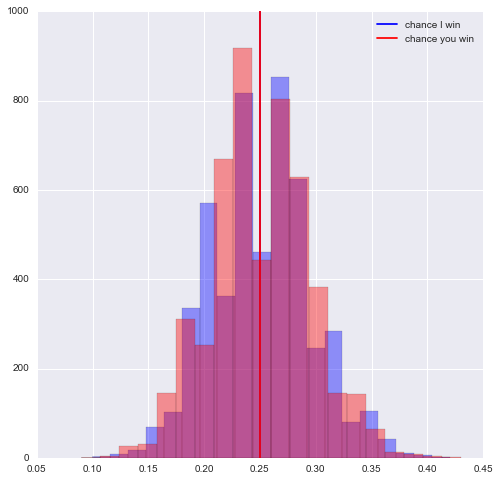

In [144]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
_=ax.hist(winning[:,0],color='b',alpha=0.4,bins=20)
_=ax.axvline(winning[:,0].mean(),color='b',label='chance I win')
_=ax.hist(winning[:,1],color='r',alpha=0.4,bins=20)
_=ax.axvline(winning[:,1].mean(),color='r',label='chance you win')
ax.legend()

Seems to be a fair game

# Flip a coin until a pattern emerge, you pick HHT, I pick THH, is this fair?

In [167]:
targets = [['H','H','T'],['T','H','H']]
def flip_emerge_game(targets,seqLen):
    temp=[];
    for ii in range(int(1e5)):
        if len(temp) > seqLen:
            for k, target in enumerate(targets):
                if temp[-seqLen:]==target:
                    result=k
                    break
            else:
                temp.append(flip_coin(1)[0])
        else:
            temp.append(flip_coin(1)[0])
    return result,temp


In [177]:
n = 100
N = 10
result = []
for k in range(N):
    update_progress(k,N)
    winning=[]
    for simTime in range(n):
        
        winning.append(flip_emerge_game(targets,3)[0])
    winning = np.array(winning)
    result.append([len(winning) - winning.sum(),winning.sum()])

0.900% to finish

In [182]:
print("chance you win: %d %%, and chance I win: %d %%"%(np.mean(result,axis=0)[0],np.mean(result,axis=0)[1]))

chance you win: 26 %, and chance I win: 74 %


I am winning 75% of the games

# HHT < THH, TTH < HTT, HTT < HHT??

In [184]:
targetSets = [[['H','H','T'],['T','H','H']],[['T','T','H'],['H','T','T']],[['H','T','T'],['H','H','T']]]
for targets in targetSets:
    n = 100
    N = 10
    result = []
    for k in range(N):
        update_progress(k,N)
        winning=[]
        for simTime in range(n):

            winning.append(flip_emerge_game(targets,3)[0])
        winning = np.array(winning)
        result.append([len(winning) - winning.sum(),winning.sum()])
    print(targets,"\n chance you win: %d %%, and chance I win: %d %%"%(np.mean(result,axis=0)[0],np.mean(result,axis=0)[1]))

0.900% to finish[['H', 'H', 'T'], ['T', 'H', 'H']] 
 chance you win: 25 %, and chance I win: 74 %
0.900% to finish[['T', 'T', 'H'], ['H', 'T', 'T']] 
 chance you win: 25 %, and chance I win: 74 %
0.900% to finish[['H', 'T', 'T'], ['H', 'H', 'T']] 
 chance you win: 31 %, and chance I win: 68 %
